In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import cv2
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from src import image_metrics, io_utils, image_utils
from src.Tile import Tile

# Cutting and cropping

In this notebook we are going to cut and crop selected images to prepare for the next step of the project.

In [4]:
folder_list = [
    'dataset/google/azulejo',
    'dataset/google/portuguese tiles',
    'dataset/bing/azulejo',
    'dataset/bing/portuguese tile',
    'dataset/bing/azulejo vector',
    'dataset/bing/portuguese tile vector',
    'dataset/hand-selected' # some hand selected images I downloaded by hand
]

In [5]:
for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    if folder == 'dataset/hand-selected':
        folder += '/1x1'
        files = [_ for _ in os.listdir(folder)  if _.endswith(".jpg")]
    else:
        files = [
            _.strip() 
            for _ in 
            open('lists/symmetric_{}.txt'.format(folder.replace('/', '-')), 'r').readlines()
        ]
    
    imgs = [
        image_utils.crop(img)
        for img 
        in io_utils.read_imgs(files, folder)
    ]
    
    [
        cv2.imwrite('dataset_processed/{}_{}'.format(folder.replace('/', '-'), file), img) 
        for (img, file) 
        in zip(imgs, files)
    ]

Working on dataset/google/azulejo folder.
Working on dataset/google/portuguese tiles folder.
Working on dataset/bing/azulejo folder.
Working on dataset/bing/portuguese tile folder.
Working on dataset/bing/azulejo vector folder.
Working on dataset/bing/portuguese tile vector folder.
Working on dataset/hand-selected folder.


In [6]:
for folder in folder_list:
    print('Working on {} folder.'.format(folder))
    for n in [2, 3, 4]:
        print(n)
        if folder == 'dataset/hand-selected':
            files = [
                '{n}x{n}/'.format(n=n) + _ 
                for _ 
                in os.listdir(folder+'/{n}x{n}'.format(n=n)) 
                if _.endswith(".jpg")
            ]
        else:
            files = [
                _.strip() 
                for _ in 
                open('lists/multitile_{n}x{n}_{folder}.txt'.format(
                    folder = folder.replace('/', '-'),
                    n=n
                ), 'r').readlines()
            ]

        tiles = [
            Tile(image_utils.crop(img))
            for img 
            in io_utils.read_imgs(files, folder)
        ]

        [
            [
                cv2.imwrite('dataset_processed/{}_{}_{}_{}.jpg'.format(
                    folder.replace('/', '-'), 
                    n,
                    os.path.splitext(file.replace('/', '-'))[0],
                    k
                ), subtile.img)
                for k, subtile 
                in enumerate(tile.get_pieces(n))
            ] 
            for (tile, file) 
            in zip(tiles, files)
        ]

Working on dataset/google/azulejo folder.
2
3
4
Working on dataset/google/portuguese tiles folder.
2
3
4
Working on dataset/bing/azulejo folder.
2
3
4
Working on dataset/bing/portuguese tile folder.
2
3
4
Working on dataset/bing/azulejo vector folder.
2
3
4
Working on dataset/bing/portuguese tile vector folder.
2
3
4
Working on dataset/hand-selected folder.
2
3
4


Visual sample of processed images ready for the next step is below:

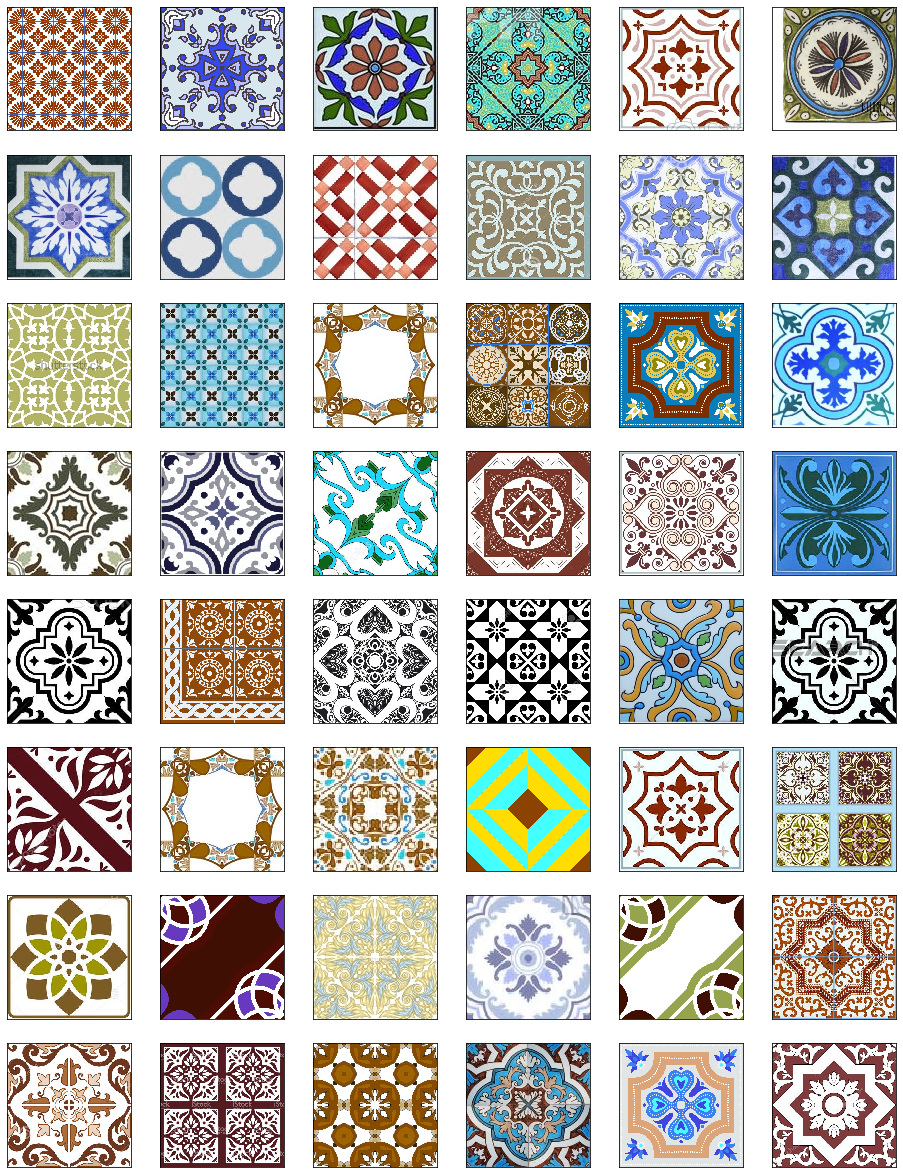

In [7]:
files = [
    _
    for _ 
    in os.listdir('dataset_processed') 
    if _.endswith(".jpg")
]

io_utils.plot_sample_files(files, plot_sample=48, folder='dataset_processed')

Let's check out final sample size:

In [13]:
len([_ for _ in os.listdir('dataset_processed')  if _.endswith(".jpg")])

1808